In [1]:
from pydstarlite.implementation import *
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

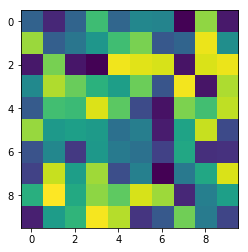

In [12]:
data = np.random.random((10,10))
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(data)

In [13]:
def init():
    img.set_data(data)
    return img,

In [14]:
def animate(i):
    img.set_data(np.random.random((10,10)))
    return img,

In [15]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [16]:
# Requires ffmpeg installed - `brew install ffmpeg` on Mac
HTML(anim.to_html5_video())